In [742]:
import os as os
os.chdir("F:\Python_proj")
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [743]:
data_f=pd.read_csv("final3.csv",encoding="latin-1")
#data_f1=pd.read_csv("mov_data.csv",encoding="latin-1")

In [837]:
#data_f.dtypes

In [746]:
data_f=data_f.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1', 'Unnamed: 0.1.1'],axis=1)

In [747]:

list_1=data_f["profit"].tolist()
list_1=[math.log(x+1) for x in list_1]
print(min(list_1))

-8.553364558554565


In [748]:

list_2=data_f["profit"].tolist()
list_2=[(x+1)**0.5 for x in list_2]
print(min(list_2))

0.0138886644426


In [749]:

list_3=data_f["profit"].tolist()
list_3=[(x+1) for x in list_3]
print(min(list_3))

0.000192895


In [750]:
import numpy as np

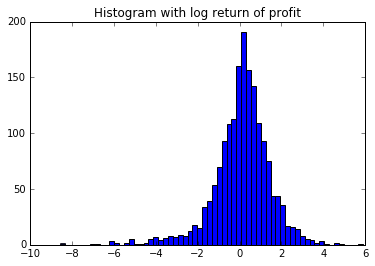

In [751]:
a = np.hstack((np.array(list_1)))
plt.hist(a, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram with log return of profit")
plt.show()

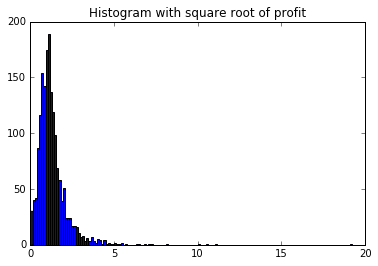

In [752]:
a = np.hstack((np.array(list_2)))
plt.hist(a, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram with square root of profit")
plt.show()

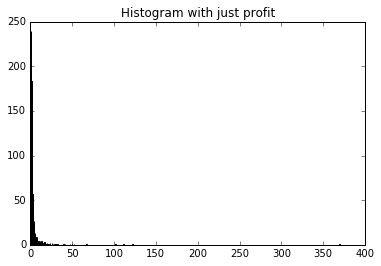

In [753]:
a = np.hstack((np.array(list_3)))
plt.hist(a, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram with just profit")
plt.show()

In [399]:
data_f1=pd.read_csv("mov_data21.csv",encoding="latin-1")

In [754]:
imdb_l=data_f1["imdb_score"].tolist()


In [755]:
#tdf1=data_f1.ix[:,0:2]
#tdf2=data_f1.ix[:,94:96]

In [57]:
#ac_df=pd.concat([tdf1,tdf2,])

Index(['actor1_age', 'actor1_awards'], dtype='object')

In [756]:
a=np.mean(list_1)

In [757]:
a

0.091733453665050882

In [758]:
m=min(list_1)
m

-8.553364558554565

In [759]:
max(list_1)

5.911953929141274

In [760]:
standard=np.std(list_1)

In [761]:
standard

1.3823705812176594

In [469]:
k_df1=pd.DataFrame({'imdb_sc':imdb_l})
k_df2=pd.DataFrame({'profit1':list_1})
k_data=pd.concat([k_df1,k_df2],axis=1)

In [762]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np
from scipy import cluster
from matplotlib import pyplot

In [763]:
X_scaled = preprocessing.scale(k_data)

In [765]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
#list(kmeans.labels_)

In [768]:
len(list(kmeans.labels_))
count=0
for i in list(kmeans.labels_):
    if i==0:
        count=count+1
print(count)

610


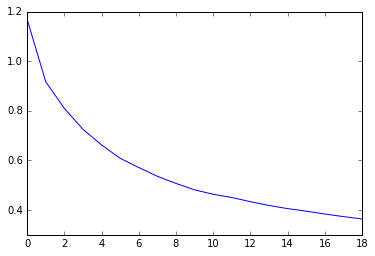

In [769]:

initial = [cluster.vq.kmeans(X_scaled,i) for i in range(1,20)]
pyplot.plot([var for (cent,var) in initial])
pyplot.show()

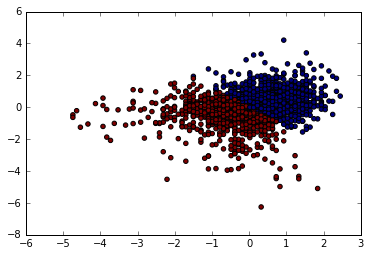

In [770]:
cent, var = initial[1]
#use vq() to get as assignment for each obs.
assignment,cdist = cluster.vq.vq(X_scaled,cent)
pyplot.scatter(X_scaled[:,0], X_scaled[:,1], c=assignment)
pyplot.show()

In [771]:
pro_list=list(assignment)

In [773]:
#len(list(kmeans.labels_))
count=0
for i in pro_list:
    if i==1:
        count=count+1
print(count)

861


In [791]:
df1=pd.DataFrame({'pro_class':pro_list})

In [792]:
data=pd.concat([data_f,df1,k_data],axis=1)

In [793]:
data.to_csv("Final_data.csv")

In [794]:
data.columns

Index(['tweet_2', 'tweet_1', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name',
       ...
       'actor1_awards', 'director_awards', 'director_name', 'actor2_awards',
       'actor1_publicity', 'actor2_publicity', 'director_publicity',
       'pro_class', 'imdb_sc', 'profit1'],
      dtype='object', length=105)

In [795]:

data=data.drop(['actor_2_name','gross','actor_1_name', 'movie_title','actor_3_name','actor_3_facebook_likes','plot_keywords','title_year','assassin', 'spy', 'scientist',
       'vampire', 'vomiting', 'king', 'hospital', 'writer', 'student',
       'future', 'fight', 'teenager', 'president', 'sex', 'terrorist', 'train',
       'best.friend', 'college', 'serial.killer', 'hotel', 'christmas',
       'secret', 'female.protagonist', 'battle', 'box.office.flop', 'rescue',
       'cia', 'detective', 'lawyer', 'escape', 'party', 'wedding', 'island',
       'marriage', 'dog', 'friendship', 'drugs', 'money', 'revenge', 'prison',
       'school', 'boy', 'fbi', 'alien', 'high.school', 'new.york.city',
       'police', 'death', 'murder', 'friend', 'love', 'profit', 'gross1','director_name', 'pc','budget',"imdb_sc",'profit1'],axis=1)


In [797]:
X = data.ix[:, data.columns != 'pro_class']
y = data.ix[:, data.columns == 'pro_class']

In [801]:
#y

In [802]:
#data.hist(figsize=[20,30]);

In [803]:
#cont_var=data.describe().columns
#cont_var=cont_var[:9]+cont_var[31:]

In [804]:
#cont_var=cont_var[:-3]


In [805]:
#dt.hist(figsize=[20,30]);

In [806]:
#data=data.drop([],axis=1)

#data.drop(["director_name"],axis=1)
#X = dt.ix[:, dt.columns != 'pro_clas']
#y = dt.ix[:, dt.columns == 'pro_clas']

In [807]:
#y=y

In [808]:
from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [809]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [810]:
def Kfold_validation(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_parameters = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_parameters),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_parameters

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_para in c_parameters:
        print('-----------')
        print('C parameter: ', c_para)
        print('\n')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_para, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('------------')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('Best C parameter = ', best_c)
    return best_c

In [811]:
best_c = Kfold_validation(X_train,y_train)

-----------
C parameter:  0.01



Iteration  1 : recall score =  0.590551181102
Iteration  2 : recall score =  0.630630630631
Iteration  3 : recall score =  0.528
Iteration  4 : recall score =  0.616666666667
Iteration  5 : recall score =  0.556451612903

Mean recall score  0.584460018261
------------
-----------
C parameter:  0.1



Iteration  1 : recall score =  0.669291338583
Iteration  2 : recall score =  0.63963963964
Iteration  3 : recall score =  0.6
Iteration  4 : recall score =  0.691666666667
Iteration  5 : recall score =  0.701612903226

Mean recall score  0.660442109623
------------
-----------
C parameter:  1



Iteration  1 : recall score =  0.653543307087
Iteration  2 : recall score =  0.657657657658
Iteration  3 : recall score =  0.576
Iteration  4 : recall score =  0.733333333333
Iteration  5 : recall score =  0.685483870968

Mean recall score  0.661203633809
------------
-----------
C parameter:  10



Iteration  1 : recall score =  0.661417322835
Iteration  2 : recal

In [812]:
#Plot confusion matrix
import itertools
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

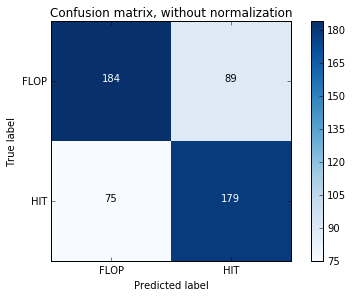

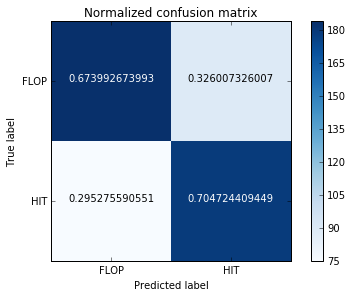

In [814]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test.values)
class_names=['FLOP','HIT']
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
#print("Recall metric in the testing dataset: ", recall_score(y_pred,y_test))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


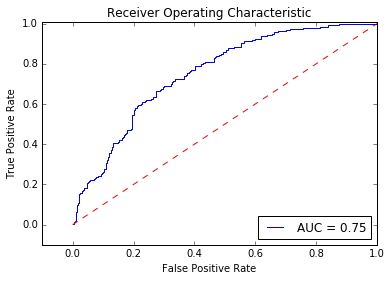

In [815]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_score = lr.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [820]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(MinMaxScaler(),LogisticRegression(C = 10, penalty = 'l1',class_weight='balanced'))
#lr = LogisticRegression(C = best_c, penalty = 'l1',class_weight='balanced')
pipe.fit(X_train,y_train.values.ravel())
#y_pred = lr.predict(X_test.values)
LR_score1=pipe.score(X_test,y_test)

##Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test,y_pred)
#np.set_printoptions(precision=2)
#LR_score=cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])

print("Train Score : {:.3f}%".format(pipe.score(X_train,y_train)*100))
print("Test Score : {:.3f}%".format(LR_score1*100))
#pipe.get_params()


Train Score : 67.726%
Test Score : 68.880%


Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.996062992126
Recall metric in the testing dataset:  0.972440944882
Recall metric in the testing dataset:  0.909448818898
Recall metric in the testing dataset:  0.594488188976
Recall metric in the testing dataset:  0.0590551181102
Recall metric in the testing dataset:  0.00393700787402
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0


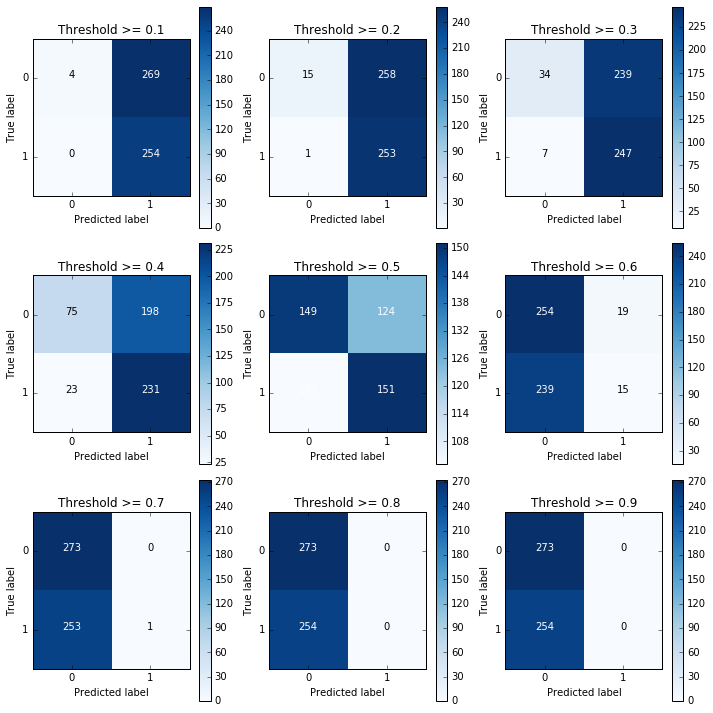

In [821]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

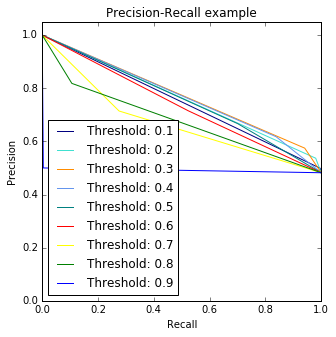

In [823]:
from itertools import cycle

lr = LogisticRegression(C = 10, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

In [824]:
#from sklearn import tree
#clf = tree.DecisionTreeClassifier(max_depth=2)
#clf.fit(X_train, y_train)
#tree_dot=export_graphviz(clf,out_file=None) 


In [825]:
#print(tree_dot)

In [826]:
#!pip install graphviz
#import graphviz

In [827]:
#graph=graphviz.Source(tree_dot,format="png")
#graph.render(filename="test")
#graph

In [828]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#Decision Trees
dt = DecisionTreeClassifier(max_depth=5, random_state=99,class_weight='balanced')
dt.fit(X_train, y_train)
dt_result=dt.score(X_test,y_test)
dt_result1=dt.score(X_train,y_train)
y_pred1=dt.predict(X_test)
#dt_result2=dt.score(y_pred,y_test)
print("Train_accuracy:",dt_result1,"Test_accuracy:",dt_result)

Train_accuracy: 0.706601466993 Test_accuracy: 0.628083491461


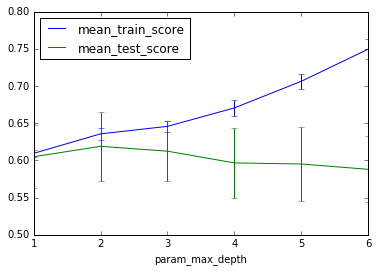

In [829]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100))
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [830]:
'''from sklearn.svm import SVC
l_svc = SVC(kernel = 'linear', probability = True, class_weight = 'balanced', random_state = 42)
l_svc.fit(X_train,y_train)

print(l_svc.score(X_test,y_test))
pred = l_svc.predict_proba(X_test)
print("ROC Score: {:.3f}".format(roc_auc_score(y_test, pred)))'''

'from sklearn.svm import SVC\nl_svc = SVC(kernel = \'linear\', probability = True, class_weight = \'balanced\', random_state = 42)\nl_svc.fit(X_train,y_train)\n\nprint(l_svc.score(X_test,y_test))\npred = l_svc.predict_proba(X_test)\nprint("ROC Score: {:.3f}".format(roc_auc_score(y_test, pred)))'

In [831]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from math import sqrt
#X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.15,random_state=0)#random_state=42,test_size=0.2)

#n_features=X_train.shape[1]
clf = RandomForestClassifier( oob_score=True, n_estimators=300,max_features = 'auto', random_state=0,max_depth=None, min_samples_split=3,class_weight='balanced')
#scores = cross_val_score(clf, X_train, y_train)
#print(scores.mean())

classifier = clf.fit(X_train,y_train)
#predictions = classifier.predict_proba(X_test)
# pred_rf = rf.predict_proba(X_test)
# pred = voting.predict(X_test)
print(" Score: {:.3f}".format(clf.score(X_test,y_test)*100))
print(" Score: {:.3f}".format(clf.score(X_train,y_train)*100))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 Score: 67.552
 Score: 100.000


In [832]:
#adaboostclassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
proba=ada.predict_proba(X_train)
ada_result=ada.score(X_test,y_test)
y_pred5=ada.predict(X_test)
print("probability:",proba,"score:",ada_result)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


probability: [[ 0.51  0.49]
 [ 0.51  0.49]
 [ 0.5   0.5 ]
 ..., 
 [ 0.49  0.51]
 [ 0.49  0.51]
 [ 0.5   0.5 ]] score: 0.654648956357


In [833]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [834]:
rf.feature_importances_

array([ 0.05,  0.05,  0.08,  0.09,  0.07,  0.05,  0.06,  0.03,  0.05,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.  ,  0.01,  0.  ,
        0.  ,  0.01,  0.  ,  0.02,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.05,  0.05,  0.06,  0.05,  0.05,
        0.04,  0.04])

([<matplotlib.axis.YTick at 0x2398be92d68>,
 <a list of 38 Text yticklabel objects>)

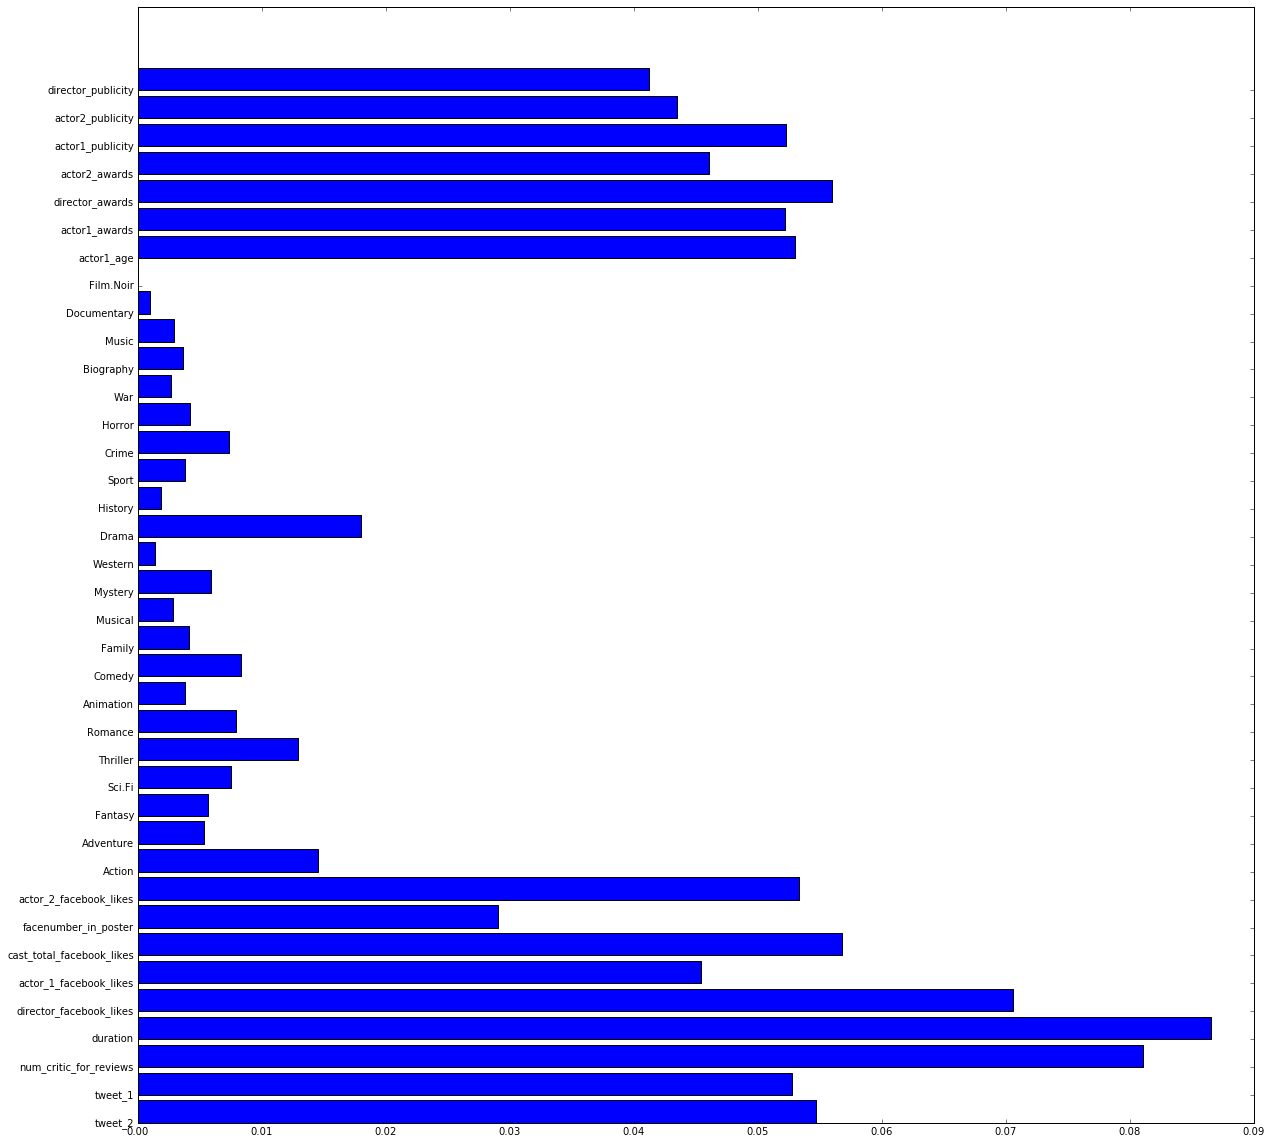

In [836]:
plt.figure(figsize=(20,20))
plt.barh(range(38), rf.feature_importances_)
plt.yticks(range(38), X_train.columns.values)